<a href="https://colab.research.google.com/github/AarnoStormborn/Tensorflow-Developer-Certification/blob/main/02_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Classification with Neural Networks
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit



In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
m = 1000

X, y = make_circles(m,
                    noise=0.03,
                    random_state=40)

X.shape, y.shape

((1000, 2), (1000,))

## Visualize the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})
data

,X0,X1,label
0,-0.801468,0.475807,0
1,0.571552,0.802809,0
2,0.292493,0.803250,1
3,-0.397783,0.642611,1
4,1.001124,0.195508,0
...,...,...,...
995,0.708477,-0.687116,0
996,-0.515371,0.858245,0
997,1.004039,0.103110,0
998,-0.886062,0.336206,0


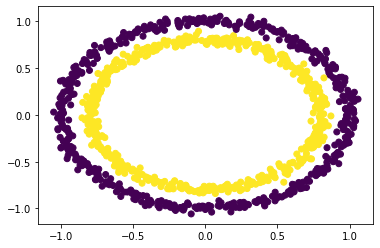

In [ ]:
plt.scatter(data['X0'], data['X1'], c=data['label'])

In [ ]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## Steps in Modelling

1. Define
2. Compile
3. Fit
4. Evaluate

In [ ]:
tf.random.set_seed(40)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.15, verbose=0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9900


[0.05577889084815979, 0.9900000095367432]

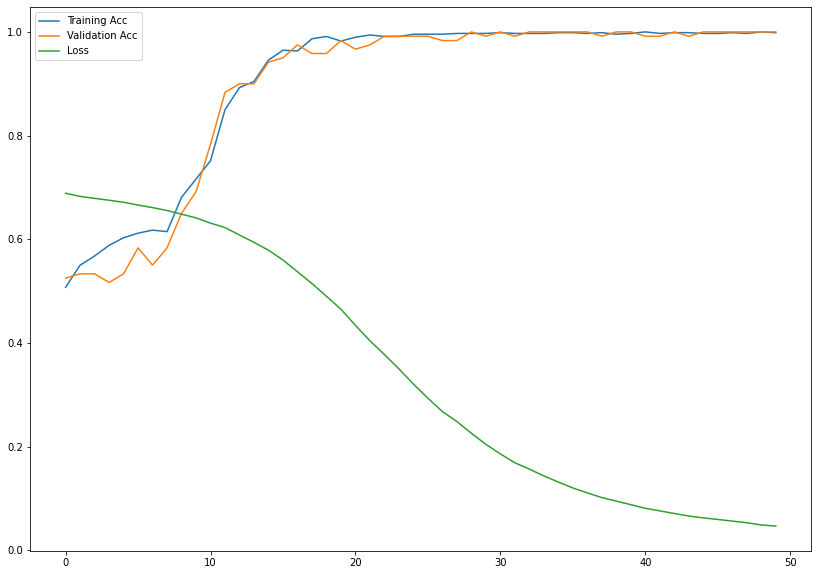

In [ ]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(14,10))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()

## Visualize the activation functions

* Sigmoid / Logistic Function
* ReLU / Rectified Linear Unit
* tanh / Hyperbolic Tangent Function

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
import numpy as np

In [ ]:
# Create a random numpy array
A = np.arange(-10 ,10, 1)
A.shape, A

((20,), array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9]))

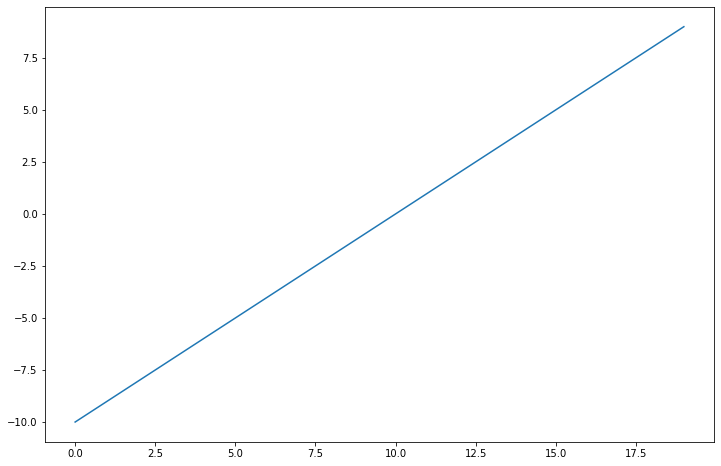

In [ ]:
plt.plot(A)

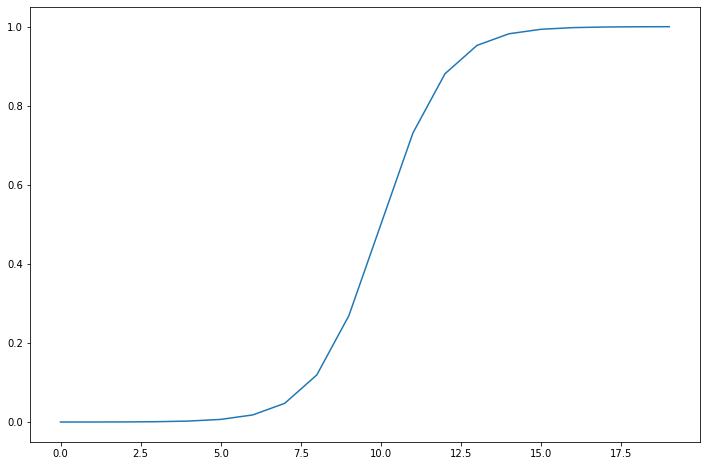

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot(sigmoid(A))

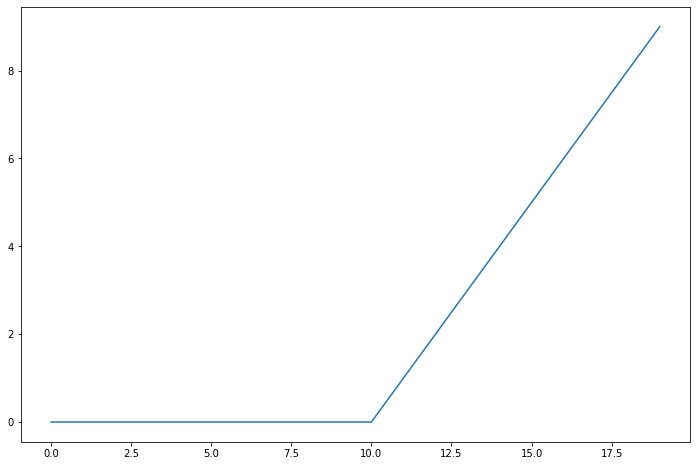

In [ ]:
def relu(z):
    return np.maximum(0, z)

plt.plot(relu(A))

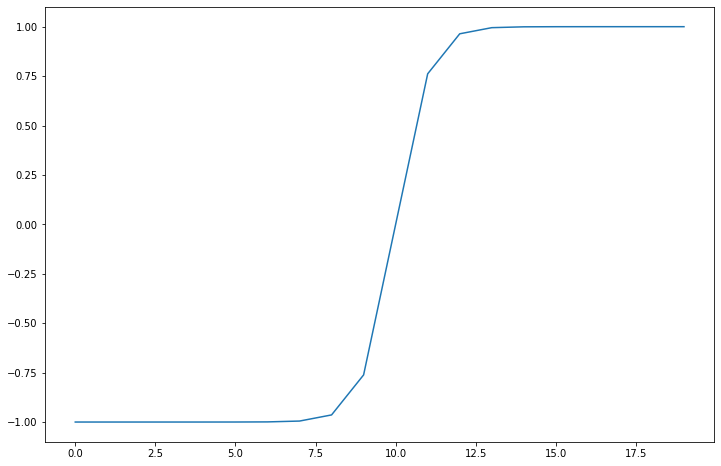

In [ ]:
def tanh(z):
    return np.tanh(z)

plt.plot(tanh(A))

## Finding the best learning rate

To find the ideal learning rate:
* Learning rate callback
* Build another model
* A modified loss rate curve

In [ ]:
tf.random.set_seed(40)

# 1. Define the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# 4. Fit the model
history = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 943us/step - loss: 0.6979 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 928us/step - loss: 0.6976 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 930us/step - loss: 0.6975 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 912us/step - loss: 0.6974 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 969us/step - loss: 0.6973 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 914us/step - loss: 0.6970 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 933u

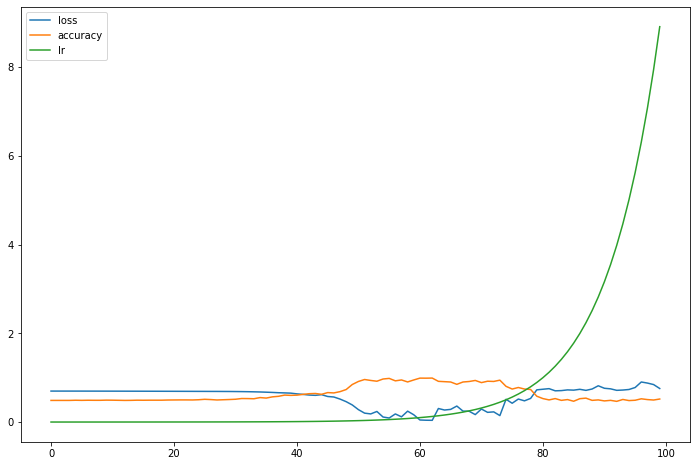

In [ ]:
pd.DataFrame(history.history).plot()

## Plot the Learning rate vs Loss

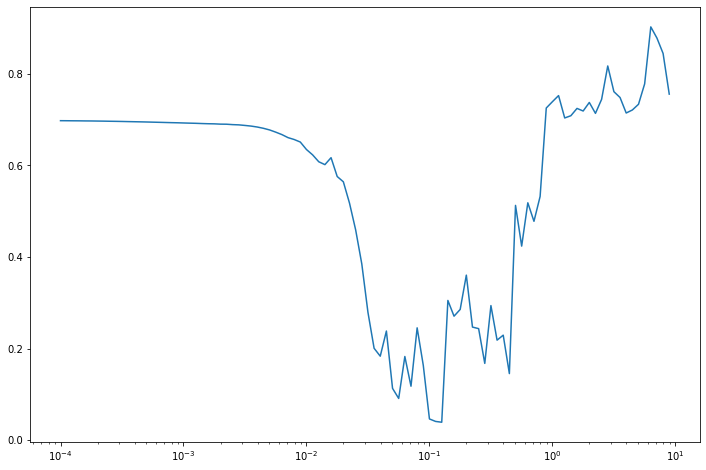

In [ ]:
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.semilogx(lrs, history.history['loss'])
plt.show()

## Build a model with the ideal learning rate

In [ ]:
tf.random.set_seed(40)

# 1. Define the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 926us/step - loss: 0.6959 - accuracy: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 918us/step - loss: 0.6925 - accuracy: 0.4613
Epoch 3/100
25/25 [==============================] - 0s 935us/step - loss: 0.6884 - accuracy: 0.5288
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5362
Epoch 5/100
25/25 [==============================] - 0s 976us/step - loss: 0.6792 - accuracy: 0.5500
Epoch 6/100
25/25 [==============================] - 0s 924us/step - loss: 0.6735 - accuracy: 0.5688
Epoch 7/100
25/25 [==============================] - 0s 904us/step - loss: 0.6656 - accuracy: 0.5638
Epoch 8/100
25/25 [==============================] - 0s 903us/step - loss: 0.6587 - accuracy: 0.6037
Epoch 9/100
25/25 [==============================] - 0s 951us/step - loss: 0.6486 - accuracy: 0.5987
Epoch 10/100
25/25 [==============================] - 0s 942us/step - loss: 0.6395 - accuracy

In [ ]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 1.0000


[0.021148378029465675, 1.0]

## Classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification Report (from scikit-learn)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = tf.round(model_3.predict(X_test))
confusion_matrix(y_test, y_pred)

array([[ 99,   0],
       [  0, 101]])

## Prettify the Confusion Matrix

* Seaborn Heatmap
* Scikit-Learn's `plot_confusion_matrix`

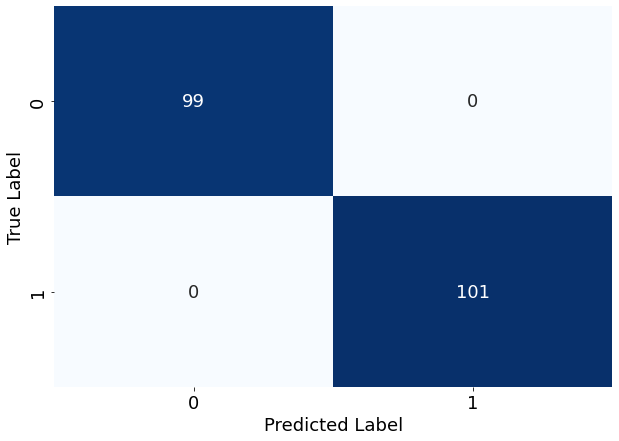

In [ ]:
# Seaborn Heatmap
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 18
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Working with a larger example - Multiclass Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is already split into Train and Test sets
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample: \n{train_data[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Shape of a single example
train_data[0].shape

(28, 28)

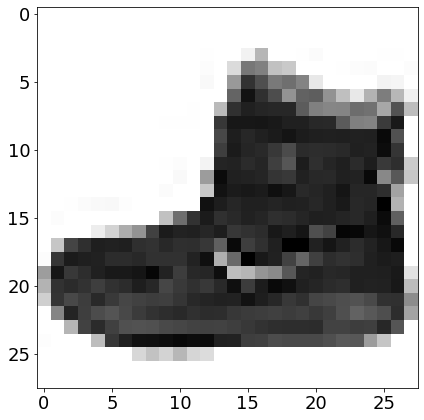

In [ ]:
# Plot a single sample - plot Image
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.show()

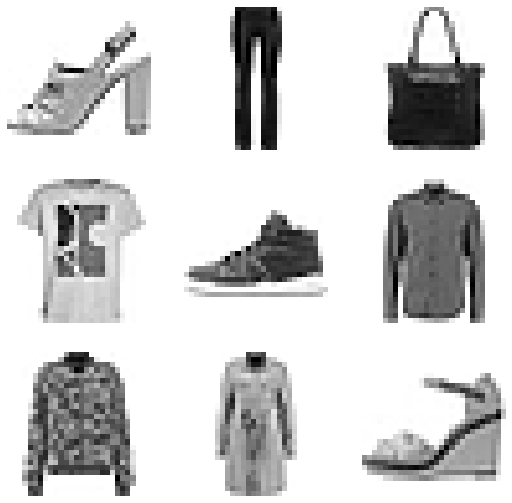

In [ ]:
# Plot more samples randomly
import random
plt.figure(figsize=(9,9))
for i in range(9):
    ax = plt.subplot(3, 3 ,i+1)
    index=random.choice(range(len(train_data)))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.axis(False)


## Building a multiclass classification Neural Network Model

* Input shape = (28x28) (single image)
* Output shape = 10 (num_classes=10)
* Shape of Labels = (m, num_classes) (m: training samples)
* Loss Function = `tensorflow.keras.losses.CategoricalCrossentropy()`
> If labels are one_hot_encoded (m,num_classes), use `CategoricalCrossentropy()`, otherwise (m,none), use `SparseCategoricalEntropy()`
* Output Activation = 'softmax'


In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_labels_ohe = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_ohe = tf.keras.utils.to_categorical(test_labels, num_classes=10)
train_labels_ohe.shape, test_labels_ohe.shape

((60000, 10), (10000, 10))

In [ ]:
# Set random seed
tf.random.set_seed(40)

# 1. Define the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(train_data, train_labels_ohe, epochs=10, validation_split=0.20)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5746 - accuracy: 0.4387 - val_loss: 1.1024 - val_accuracy: 0.5944
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1115 - accuracy: 0.5681 - val_loss: 0.9280 - val_accuracy: 0.6569
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9643 - accuracy: 0.6206 - val_loss: 0.8581 - val_accuracy: 0.6806
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9050 - accuracy: 0.6422 - val_loss: 0.9528 - val_accuracy: 0.6069
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8845 - accuracy: 0.6498 - val_loss: 0.8547 - val_accuracy: 0.6799
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8690 - accuracy: 0.6581 - val_loss: 0.8549 - val_accuracy: 0.6892
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8426 - accuracy: 0.6622 - val_loss: 0.8625 - val_accuracy:

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model_4.evaluate(test_data, test_labels_ohe)
print(f'Model Accuracy: {results[1]*100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.8499 - accuracy: 0.6888
Model Accuracy: 68.88%


## Improving the multiclass classification model

In [ ]:
# Check min and max in the train data

train_data.min(), train_data.max()

(0, 255)

<img src='https://www.oreilly.com/library/view/regression-analysis-with/9781788627306/assets/ffb3ac78-fd6f-4340-aa92-cde8ae0322d6.png'>
<br><br>
<p><b>Normalization</b>:<br> To normalize image data, we use the above formula. Since xmin is 0, the scaling is done by dividing x by xmax, which is 255. The range ends up from <b>0 to 1</b></p>

In [ ]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data.max(), train_data_norm.max()

(255, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(40)

# 1. Define the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(train_data_norm, train_labels_ohe, epochs=10, validation_split=0.20)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6759 - accuracy: 0.7849 - val_loss: 0.4870 - val_accuracy: 0.8325
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4462 - accuracy: 0.8450 - val_loss: 0.4383 - val_accuracy: 0.8451
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4057 - accuracy: 0.8575 - val_loss: 0.4114 - val_accuracy: 0.8593
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3863 - accuracy: 0.8632 - val_loss: 0.4027 - val_accuracy: 0.8603
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.8683 - val_loss: 0.3982 - val_accuracy: 0.8583
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3574 - accuracy: 0.8717 - val_loss: 0.3982 - val_accuracy: 0.8572
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3480 - accuracy: 0.8752 - val_loss: 0.3765 - val_accuracy:

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                12560     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model_5.evaluate(test_data_norm, test_labels_ohe)
print(f'Model Accuracy: {results[1]*100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8579
Model Accuracy: 85.79%


## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(40)

# 1. Define the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/20)))

# 4. Fit the model
history = model_6.fit(train_data_norm, train_labels_ohe, epochs=25, validation_split=0.20, callbacks=[lr_scheduler])

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6415 - accuracy: 0.7776 - val_loss: 0.4824 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4462 - accuracy: 0.8441 - val_loss: 0.4447 - val_accuracy: 0.8437 - lr: 0.0011
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4133 - accuracy: 0.8537 - val_loss: 0.4038 - val_accuracy: 0.8567 - lr: 0.0013
Epoch 4/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3968 - accuracy: 0.8585 - val_loss: 0.4076 - val_accuracy: 0.8567 - lr: 0.0014
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3842 - accuracy: 0.8623 - val_loss: 0.3975 - val_accuracy: 0.8624 - lr: 0.0016
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8647 - val_loss: 0.4036 - val_accuracy: 0.8558 - lr: 0.0018
Epoch 7/25
1500/1500 [==============================] - 2s

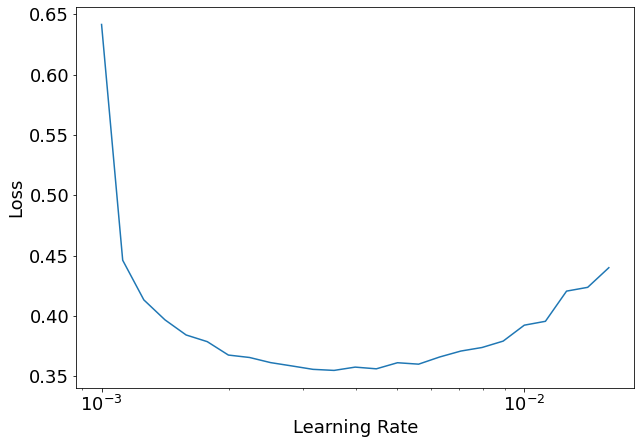

In [ ]:
# Plot epochs vs loss
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(25)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

## Putting everything together

In [ ]:
# Set random seed
tf.random.set_seed(40)

# 1. Define the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(train_data_norm, train_labels_ohe, epochs=10, validation_split=0.20)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 2s 1ms/step - loss: 0.6415 - accuracy: 0.7776 - val_loss: 0.4824 - val_accuracy: 0.8307
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4447 - accuracy: 0.8445 - val_loss: 0.4411 - val_accuracy: 0.8457
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4101 - accuracy: 0.8536 - val_loss: 0.4058 - val_accuracy: 0.8578
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8606 - val_loss: 0.3949 - val_accuracy: 0.8595
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3768 - accuracy: 0.8660 - val_loss: 0.3954 - val_accuracy: 0.8627
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3664 - accuracy: 0.8687 - val_loss: 0.4065 - val_accuracy: 0.8572
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3561 - accuracy: 0.8724 - val_loss: 0.3868 - val_accuracy: 0.8645
Epo

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 16)                12560     
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


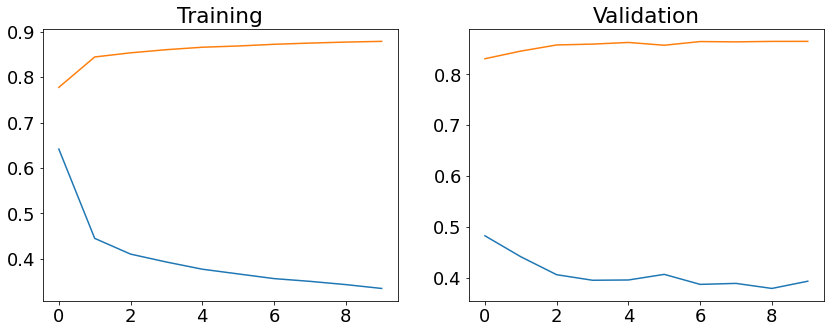

In [ ]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.title("Training")
plt.subplot(1,2,2)
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title("Validation")
plt.show()

## Evaluating the model

* Confusion Matrix

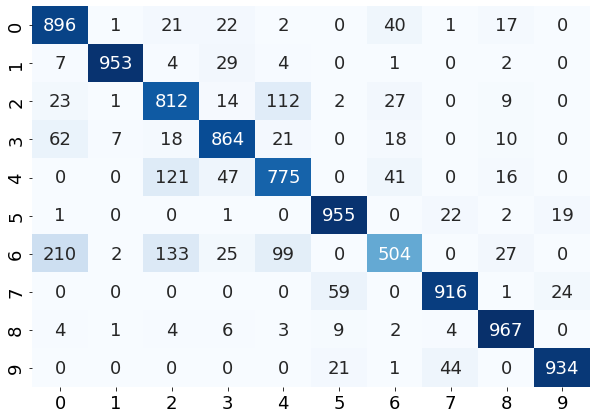

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_prob = model_7.predict(test_data_norm)
y_pred = tf.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
plt.show()

## What Patterns is our model learning

In [ ]:
# Take a look at the layers
model_7.layers

In [ ]:
# Check a single layer
model_7.layers[1]

In [ ]:
# To see patterns, check weights and bias
weights, bias = model_7.layers[1].get_weights()
weights, bias, weights.shape, bias.shape

(array([[ 0.20281918,  0.26168606, -0.17297795, ...,  0.00533621,
          0.03435179, -0.13824692],
        [ 0.20022471,  0.35331127,  0.16334894, ...,  0.24420048,
          0.03786271, -0.18575075],
        [ 0.3582062 , -0.37930486, -0.01006918, ..., -0.2926438 ,
          0.17243984, -0.4165281 ],
        ...,
        [-0.1282948 , -0.03532084,  0.1014561 , ..., -0.03631695,
         -0.07904866,  0.33048716],
        [ 0.02641965,  0.11587618, -0.2753745 , ..., -0.00435852,
         -0.03844003,  0.28553268],
        [ 0.00891457,  0.30061442,  0.03912154, ..., -0.23964845,
         -0.01444137,  0.03726265]], dtype=float32),
 array([ 0.10481804,  0.05867441,  0.29294798,  0.37212813, -0.54388696,
         0.29857072,  0.41993946, -0.58728254, -0.13277584,  0.8695875 ,
        -0.09783441,  0.21526635,  0.22543627, -0.04537052,  0.22778897,
         0.27794024], dtype=float32),
 (784, 16),
 (16,))

## Visualize the Model

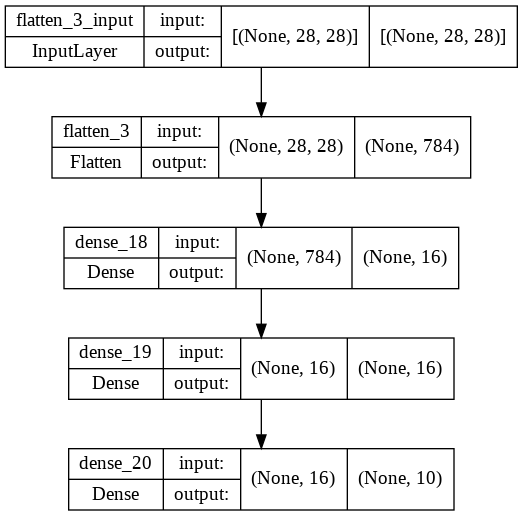

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, show_shapes=True)